## ตัวอย่าง Exploration on text data



ติดตั้ง Library 

In [16]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk import  word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import spacy
import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/phutharesuanwachirapisut/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/phutharesuanwachirapisut/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


สร้างตัวอย่างข้อมูลเบื้องต้นและจัดเก็บใน Data Frame ด้วย Pandas

In [17]:
text=["An introduction to text analysis.",
      "These're the best books for text analysis!!",
      "This book costs 40$.",
      "I am interested in NLP.",
      "Machine learning is very interesting.",
      "I would like to introduce Mark, he is Python analyst expert!",
      "The excellent link for Python is https://www.w3schools.com/python/default.asp",
      "I've started to learn Python when I was young.",
      "Several books are written by John.",
      "They're scientist."]

#convert list to data frame
import pandas as pd
data = pd.DataFrame({'Content':text})
# แสดงผลข้อมูลหลังจาก Data Preprocessing
print(data)

                                             Content
0                  An introduction to text analysis.
1        These're the best books for text analysis!!
2                               This book costs 40$.
3                            I am interested in NLP.
4              Machine learning is very interesting.
5  I would like to introduce Mark, he is Python a...
6  The excellent link for Python is https://www.w...
7     I've started to learn Python when I was young.
8                 Several books are written by John.
9                                 They're scientist.


DataPreprocessing

In [18]:
# กำจัด URL
data['Content']  = data['Content'].apply(lambda x:" ".join(re.sub(r"https?://[A-Za-z0-9./]+", '', w ) for w in x.split())) 

# Lemmatization ด้วย Spacy
nlp = spacy.load("en_core_web_sm")
data['Content'] = data['Content'].apply(lambda x: " ".join([w.lemma_ for w in nlp(x)]))
#data['Content'] = data['Content'].apply(lambda x: " ".join([w.lemma_ for w in nlp(x) if w.lemma_ != "-PRON-"]))

# แปลงข้อมูลเป็นตัวพิมพ์เล็ก ... lower case
data['Content'] = data['Content'].apply(lambda x:" ".join(w.lower() for w in x.split()))

# กำจัด stop words
stop = stopwords.words('english')
data['Content'] = data['Content'].apply(lambda x: " ".join(w for w in word_tokenize(x) if w not in stop))

# ตัดเครื่องหมายวรรคตอน ... remove punctuation
data['Content'] = data['Content'].apply(lambda x: " ".join([w for w in x.split() if w not in list(string.punctuation)]))

# กำจัดตัวเลข
data['Content']  = data['Content'].apply(lambda x:" ".join(re.sub(r"[0-9.]+", '', w ) for w in x.split())) 

# กำจัดข้อความหลัง ' เครื่องหมาย apostrophe
data['Content']  = data['Content'].apply(lambda x:" ".join(re.sub(r"(')[A-Za-z0-9.]+", '', w ) for w in x.split())) 


# แสดงผลข้อมูลหลังจาก Data Preprocessing
print(data)

                                           Content
0                       introduction text analysis
1                          good book text analysis
2                                        book cost
3                                   interested nlp
4                     machine learning interesting
5  would like introduce mark python analyst expert
6                            excellent link python
7                         start learn python young
8                          several book write john
9                                        scientist


แสดงกราฟความถี่ของคำ

<Axes: xlabel='Samples', ylabel='Counts'>

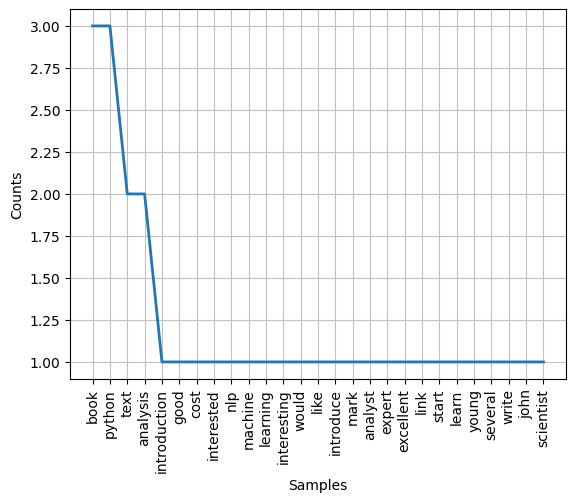

In [19]:
from nltk.tokenize import word_tokenize
frequency_dist = [ ]
for message in data['Content']:
       words = word_tokenize(message)
       for w in words:
              frequency_dist.append(w)
frequency_dist = nltk.FreqDist(frequency_dist) # วัดความถี่
frequency_dist.plot(30,cumulative=False)

สร้าง Word Cloud

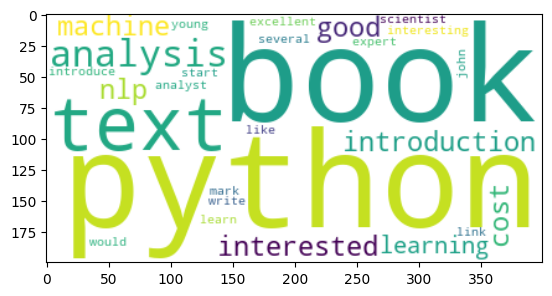

In [25]:
from wordcloud import WordCloud
wcloud = WordCloud( background_color='white').generate_from_frequencies(frequency_dist)

import matplotlib.pyplot as plt
plt.imshow(wcloud, interpolation='bilinear')
plt.axis("on")
# plt.axis("off")
plt.show()
